## Divyansh Tiwari
### DSBA Intern - TSF

# *Superstore Analysis* #

## In this project, we will try analyse the data of a Sample Superstore to identify following things:

### 1) How much profit the store is making on different type of category of items and at different places.

### 2) What are the areas the store should focus in order to gain more profit and increase its sales.

### 3) What could be the possible solutions for tackeling the issue of less sales and loss.

In [1]:
# *IMPORTING REQUIRED LIBRARIES*

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("dark_background")

In [2]:
# Reading Data from CSV

path = r'D:\Machine Learning\data\SampleSuperstore.csv'

df = pd.read_csv(path)

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

## Data Cleaning

1) Dropping unnecessary columns.

2) Getting rid of null values (if any).

In [4]:
df.drop(['Country','Postal Code','Region','Segment','City'], axis=1, inplace= True)

In [5]:
df.head()

,Ship Mode,State,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Kentucky,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Kentucky,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,California,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Florida,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Florida,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
nanVal = pd.isnull(df)

nanVal.sum()

Ship Mode       0
State           0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### This shows that there is no null values in dataframe 

In [7]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## Analysis of Data

In [8]:
# GETTING UNIQUE VALUES OF EACH COLUMN

states = pd.DataFrame(df.State.unique())

categ = pd.DataFrame(df.Category.unique())

subcateg = pd.DataFrame(df['Sub-Category'].unique())

subcateg.head()

,0
0,Bookcases
1,Chairs
2,Labels
3,Tables
4,Storage


In [9]:
# GETTING TOTAL PROFIT OF UNIQUE CLASSES

g1 = df.groupby(['State'])
state_profit = g1.agg({"Profit": np.sum})

g1 = df.groupby(['Sub-Category'])
subcateg_profit = g1.agg({"Profit": np.sum})

g1 = df.groupby(['Category'])
categ_profit = g1.agg({"Profit": np.sum})

categ_profit.head()

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


In [10]:
# GETTING TOTAL SALES OF UNIQUE CLASSES

g1 = df.groupby(['State'])
state_sales = g1.agg({"Sales": np.sum})

g1 = df.groupby(['Sub-Category'])
subcateg_sales = g1.agg({"Sales": np.sum})

g1 = df.groupby(['Category'])
categ_sales = g1.agg({"Sales": np.sum})

state_sales.head()

,Sales
State,
Alabama,19510.6400
Arizona,35282.0010
Arkansas,11678.1300
California,457687.6315
Colorado,32108.1180


In [11]:
# GETTING TOTAL QUANTITY OF UNIQUE CLASSES

g1 = df.groupby(['State'])
state_quant = g1.agg({"Quantity": np.sum})

g1 = df.groupby(['Sub-Category'])
subcateg_quant = g1.agg({"Quantity": np.sum})

g1 = df.groupby(['Category'])
categ_quant = g1.agg({"Quantity": np.sum})

subcateg_quant.head()

,Quantity
Sub-Category,
Accessories,2976
Appliances,1729
Art,3000
Binders,5974
Bookcases,868


# Visualization of Data

### Here we will plot charts and graphs of analysis and try to figure out what thing we have to focus on in order to increase the profit of superstore

In [12]:
df.head()

,Ship Mode,State,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Kentucky,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Kentucky,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,California,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Florida,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Florida,Office Supplies,Storage,22.3680,2,0.20,2.5164


## # Lets see impact on profit due to various factors

###     1) Regarding State

<AxesSubplot:title={'center':'Profit in States'}, xlabel='State'>

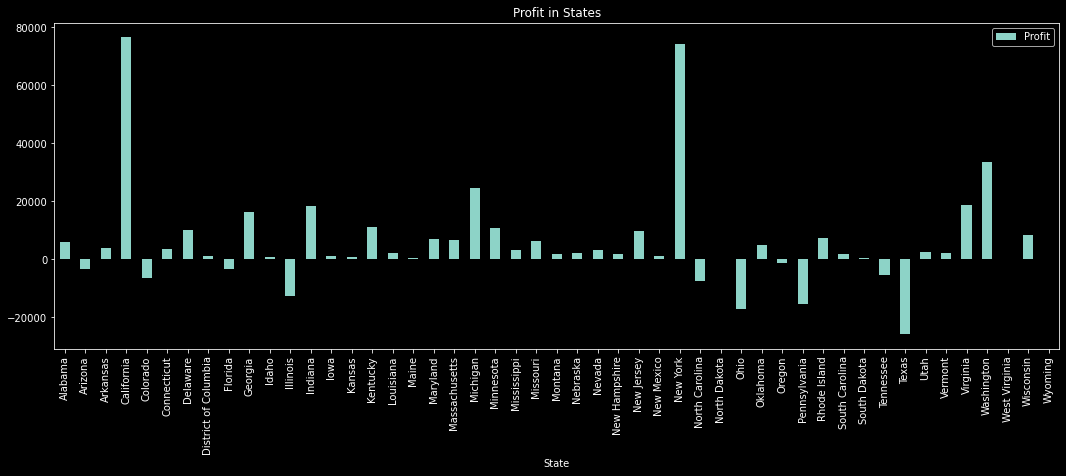

In [13]:
state_profit.plot(kind='bar',figsize=(18,6),title='Profit in States')

from this, we can find states where the store is in Loss

,Profit
State,
Arizona,-3427.9246
Colorado,-6527.8579
Florida,-3399.3017
Illinois,-12607.8870
North Carolina,-7490.9122
Ohio,-16971.3766
Oregon,-1190.4705
Pennsylvania,-15559.9603
Tennessee,-5341.6936


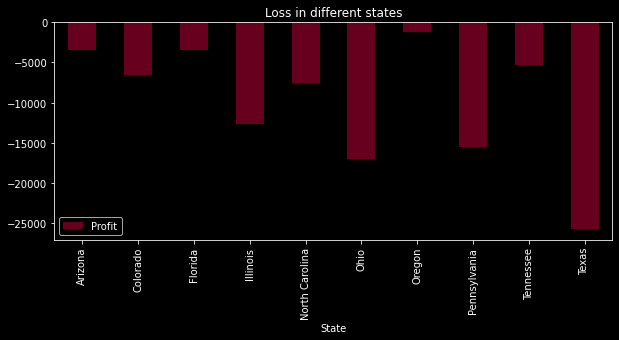

In [14]:
states_less_profit = state_profit[state_profit['Profit'] <=28]
states_less_profit.plot(kind='bar',figsize=(10,4),colormap='RdGy',title="Loss in different states")
states_less_profit

### *So these are some states we have to focus on regarding profit !!!*

###  2) Regarding Category

<AxesSubplot:title={'center':'Profit in Category'}, xlabel='Category'>

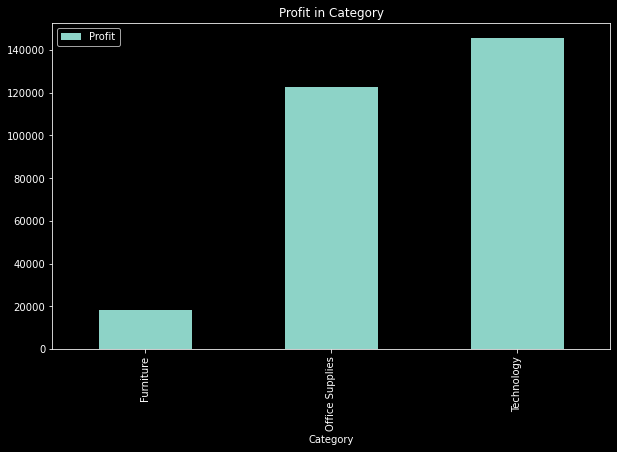

In [15]:
categ_profit.plot(kind='bar',figsize=(10,6),title='Profit in Category')

### *Clearly, We are having very less profit in "Furniture" sales  !!*

### 3) Regarding Sub Category

<AxesSubplot:title={'center':'Profit in Sub-Category'}, xlabel='Sub-Category'>

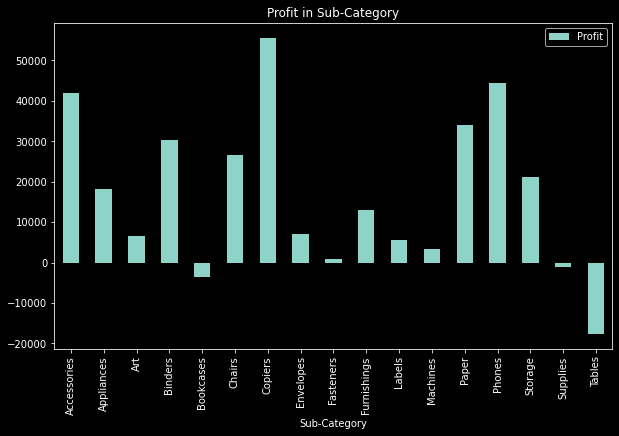

In [16]:
subcateg_profit.plot(kind='bar',figsize=(10,6),title='Profit in Sub-Category')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


,Profit
Sub-Category,
Bookcases,-3472.5560
Supplies,-1189.0995
Tables,-17725.4811


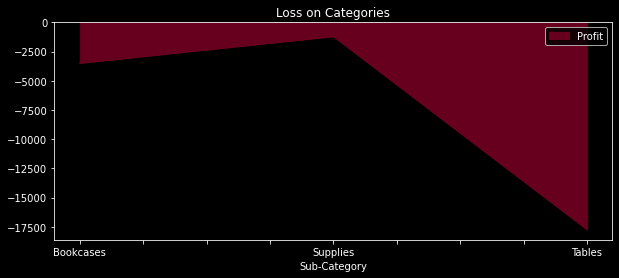

In [17]:
sub_less_profit = subcateg_profit[subcateg_profit['Profit'] <=28]
sub_less_profit.plot(kind='area',figsize=(10,4),colormap='RdGy',title="Loss on Categories")
sub_less_profit

### *We are having most loss in "Tables" . We will look for the solution further !!!*

## # Solutions we can try to overcome these loses

=> *WE FOUND OUT THAT WE ARE NOT DOING GOOD BUSINESS MOSTLY IN STATES*
### 1. Texas
### 2. Ohio
### 3. Pennsylvania
### 4. Illinois

=> *ESPECIALLY IN CATEGORY OF*
### Furniture

=>  *AND WE ARE HAVING CONSIDERABLE LOSS IN*
### sales of Tables

# Solution Time !!!!!

Lets see what are the discounts we are giving on different items where we are having loss

In [18]:
loss = df[df['Profit'] <= 0]
loss.head()

,Ship Mode,State,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Florida,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Texas,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Texas,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Pennsylvania,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Pennsylvania,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


### =) Here we see that on loss, we are given some big discounts on our products

In [19]:
discount_at_loss = loss[['Discount']]
discount_at_loss.head()

,Discount
3,0.45
14,0.80
15,0.80
23,0.30
27,0.50


In [20]:
discount_at_loss.describe()

,Discount
count,1936.000000
mean,0.469029
std,0.240765
min,0.000000
25%,0.200000
50%,0.400000
75%,0.700000
max,0.800000


### Let's see different types of discounts we are giving

In [21]:
loss_disc = pd.DataFrame(discount_at_loss.Discount.unique())

loss_disc

,0
0,0.45
1,0.80
2,0.30
3,0.50
4,0.70
5,0.60
6,0.32
7,0.20
8,0.40
9,0.15


<AxesSubplot:title={'center':'Frequency of discount ranges'}>

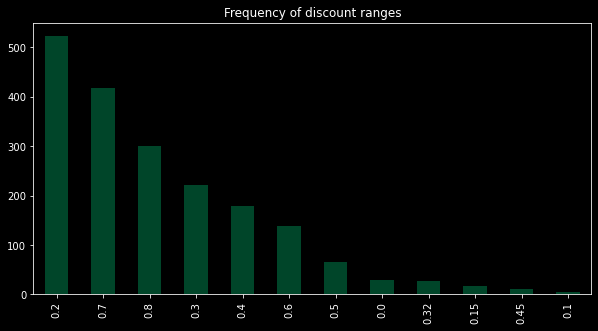

In [22]:
freq = discount_at_loss['Discount'].value_counts()
freq.plot(kind = 'bar',colormap = 'YlGn_r',figsize=(10,5),title="Frequency of discount ranges")

## So here, We conclude that one major reason of loss in sales is giving out "high discounts" 

Now let's see what is the deal with tabels regarding these discounts.

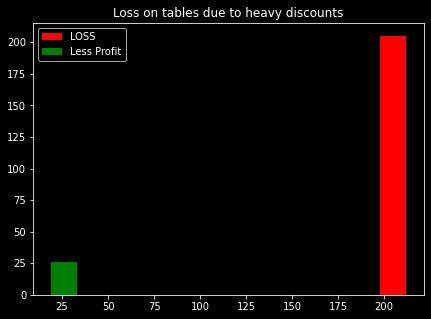

In [23]:
table = df[(df['Discount']>=0.2) & (df['Profit']<=28)]
table = table[table['Sub-Category']=='Tables']
table = table[['Profit']]
table1 = table[table['Profit']>0]
table2 = table[table['Profit']<=0]
x = table2.count()
y = table1.count()


plt.figure(figsize=(7,5))
plt.bar(x,x,width=14,label="LOSS",color='red')
plt.bar(y,y,width=14,label="Less Profit",color='green')
plt.title("Loss on tables due to heavy discounts")
plt.legend()

## This graph shows how heavy discount is causing loss in sales of Tables in almost all states

# Now our analysis of this superstore comes to end and we will put forward some ideas by which we can increase profit of the company :--

### IDEA 1 : Offer discount less than 20% on all products especially on Tables.

### IDEA 2 : Since , Texas is having most loss ,  We can reduce discount and offer other things on our products like giving away free " Copiers " on heavy shopping as we are getting so much profit on Copiers so people would rarely say NO to it. 

# Dashboard

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


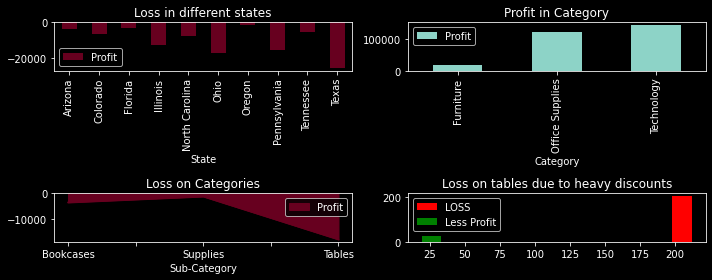

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2)

states_less_profit.plot(kind='bar',figsize=(10,4),colormap='RdGy',title="Loss in different states",ax=axes[0,0])

categ_profit.plot(kind='bar',figsize=(10,6),title='Profit in Category',ax=axes[0,1])

sub_less_profit.plot(kind='area',figsize=(10,4),colormap='RdGy',title="Loss on Categories",ax=axes[1,0])

plt.bar(x,x,width=14,label="LOSS",color='red')
plt.bar(y,y,width=14,label="Less Profit",color='green')
plt.title("Loss on tables due to heavy discounts")
plt.legend()


plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


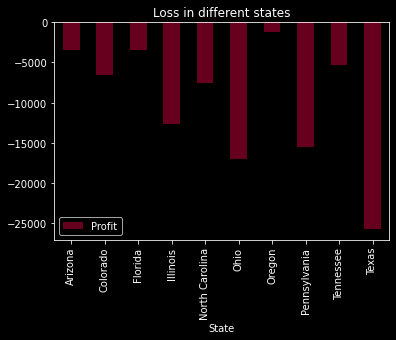

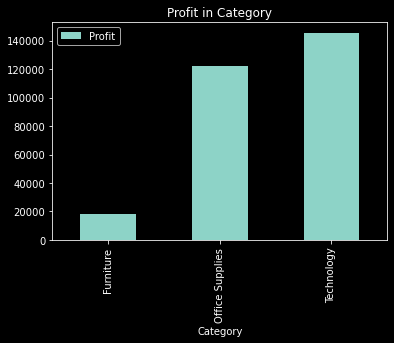

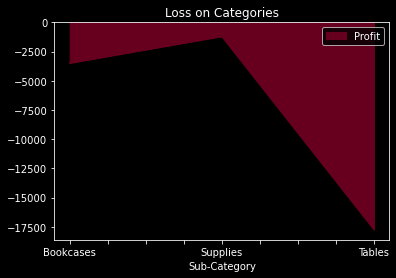

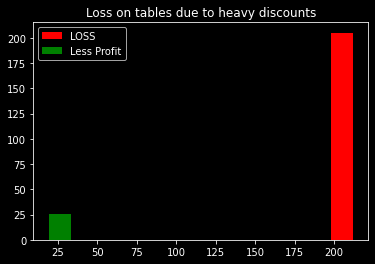

<Figure size 432x576 with 0 Axes>

In [57]:
states_less_profit.plot(kind='bar',figsize=(6,4),colormap='RdGy',title="Loss in different states")

categ_profit.plot(kind='bar',figsize=(6,4),title='Profit in Category')

sub_less_profit.plot(kind='area',figsize=(6,4),colormap='RdGy',title="Loss on Categories")

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.bar(x,x,width=14,label="LOSS",color='red')
plt.bar(y,y,width=14,label="Less Profit",color='green')
plt.title("Loss on tables due to heavy discounts")
plt.legend()
plt.figure(figsize=(6,8))

plt.tight_layout()

# The Sparks Foundation DSBA task 1 Completed here  !!! :-)